# Problem 1: Clustering

### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage. 

#### Data Dictionary for Market Segmentation:

#### spending: Amount spent by the customer per month (in 1000s)
#### advance_payments: Amount paid by the customer in advance by cash (in 100s)
#### probability_of_full_payment: Probability of payment done in full by the customer to the bank
#### current_balance: Balance amount left in the account to make purchases (in 1000s)
#### credit_limit: Limit of the amount in credit card (10000s)
#### min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
#### max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

## 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

### Import Libraries and load data

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\Vikas\\Desktop\\Thankappan\\GREAT LAKES DS&BA\\ref\\Data Mining Project')
df=pd.read_csv("bank_marketing_part1_Data.csv")

### Checking the data

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.shape

(210, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


### Checking the Summary Statistic

In [6]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


### Checking for missing values

In [7]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

### Checking for duplicates

In [9]:
dupes = df.duplicated()
sum(dupes)

0

### Checking for Outliers

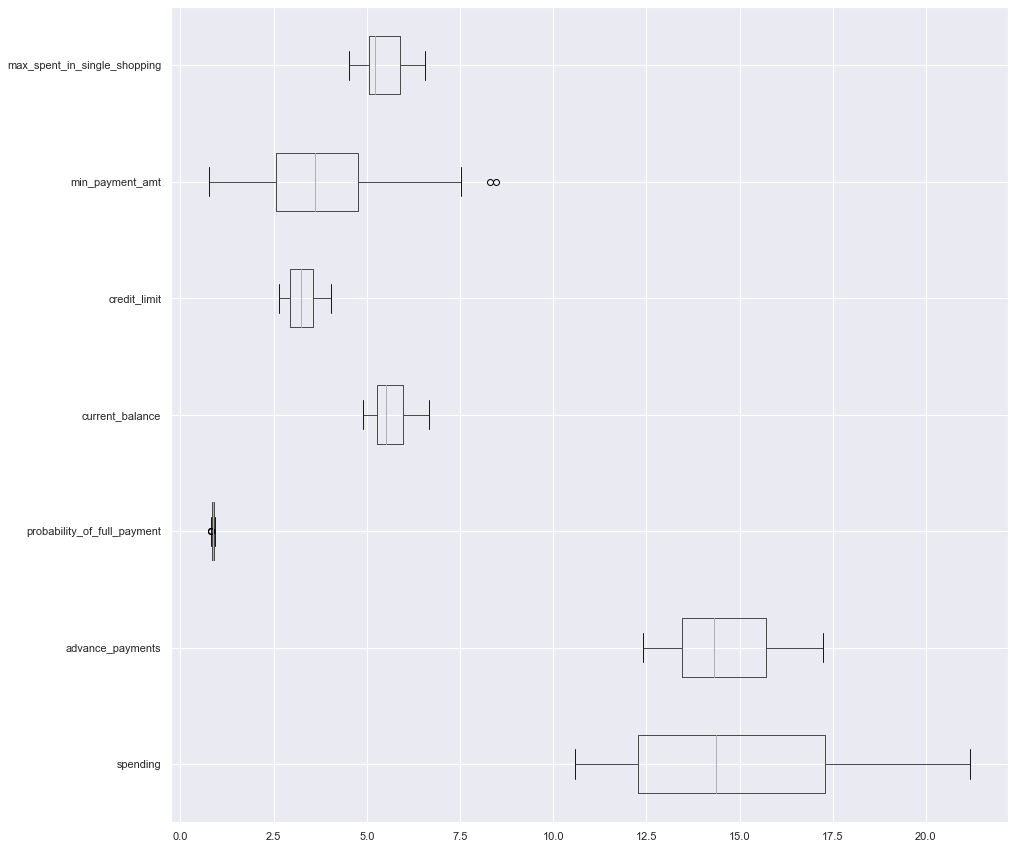

In [11]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
df.boxplot(vert=0)

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

### Considering that there is significant variation among the UOM of all seven variables, scaling needs to be done to avoid excessive weightage being assigned to any of the variables during clustering.

### Scaling of Data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X = StandardScaler()

In [15]:
scaled_df = X.fit_transform(df)

In [16]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

### Checking the Summary Statistic of scaled data

In [17]:
scaled_df1 = pd.DataFrame(scaled_df)

In [18]:
scaled_df1.describe()

,0,1,2,3,4,5,6
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.260896e-15,-1.358702e-16,-2.790757e-16,5.418946e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


### Checking for Outliers in scaled data

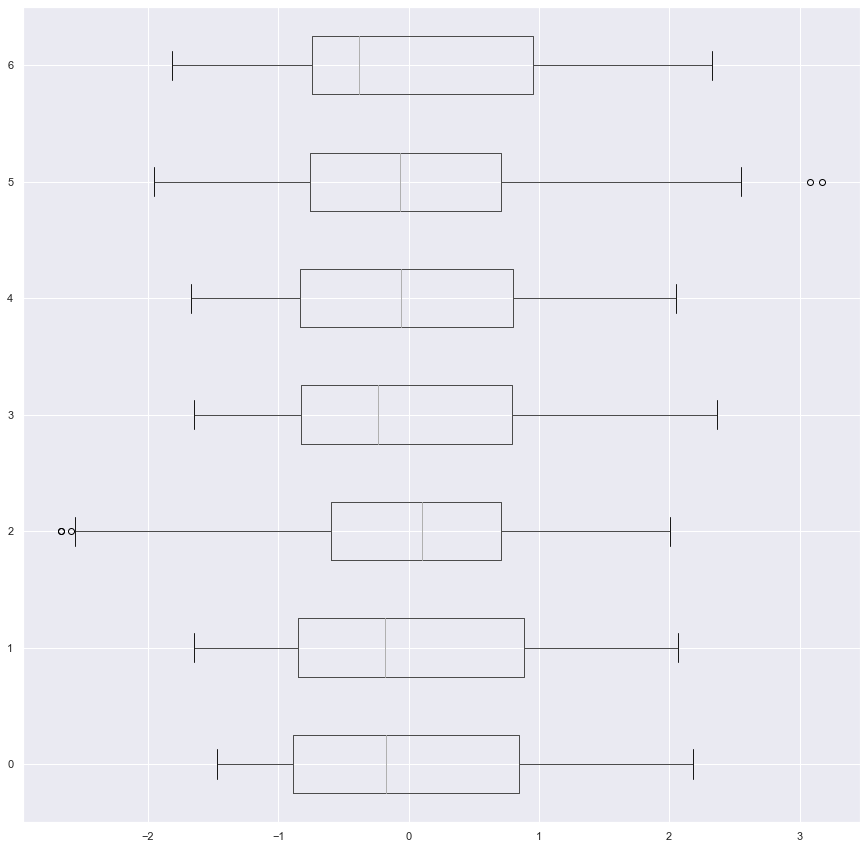

In [19]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
scaled_df1.boxplot(vert=0)

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

### Creating the Dendrogram

#### Choosing average linkage method

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
link_method = linkage(scaled_df, method = 'average')

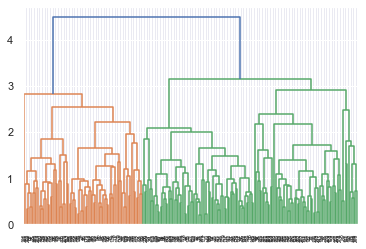

In [22]:
dend = dendrogram(link_method)

### Cutting the Dendrogram with suitable clusters

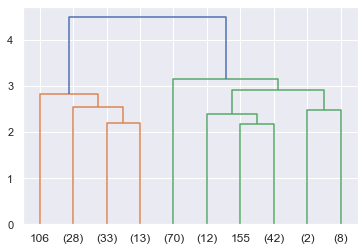

In [23]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10,
                 )

### Importing fcluster module to create clusters 

In [24]:
from scipy.cluster.hierarchy import fcluster

In [36]:
# Set criterion as distance,then create 2 clusters as recommended in dendrogram, and store the result in another object 'clusters'

clusters = fcluster(link_method, 3, criterion='distance')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

### Appending clusters to original dataset

In [37]:
df['clusters'] = clusters

In [38]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


### Cluster Frequency

In [39]:
df.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

### Cluster Profiles 

In [40]:
aggdata=df.groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


### Cluster 1: High Spenders 
### Cluster 2: Poor Spenders  
### Cluster 3: Medium Spenders

### Using Agglomerative Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
# Set n_clusters=2,affinity='euclidean', linkage='average' and store the result in another object 'Cluster_agglo'

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(df)
print(Cluster_agglo)

[1 2 1 0 1 0 0 2 1 0 1 1 0 1 2 0 2 0 2 2 0 0 1 2 2 1 2 0 0 0 2 0 0 2 0 0 0
 0 0 1 1 2 1 1 0 0 2 1 1 1 2 1 1 1 1 1 0 0 0 1 2 0 0 1 2 1 1 2 1 0 2 0 1 1
 0 1 2 0 1 2 2 2 2 1 0 1 1 1 1 0 0 1 2 0 0 1 1 1 0 1 0 1 2 1 2 1 1 0 0 1 1
 2 1 0 0 1 2 0 0 1 2 0 0 2 2 2 1 0 2 2 0 2 2 1 0 1 1 0 1 2 1 2 0 0 2 0 1 0
 2 0 2 0 2 1 2 2 2 0 2 1 1 0 1 1 1 0 1 2 2 2 2 0 2 1 1 1 2 2 2 0 2 2 2 2 1
 1 2 1 2 0 2 2 0 1 2 1 1 0 1 0 2 2 2 0 1 2 1 2 2 1]


In [42]:
df1=df.copy()

### Appending clusters to original dataset

In [43]:
df1["Agglo_CLusters"]=Cluster_agglo

In [44]:
df1.Agglo_CLusters.value_counts().sort_index()

0    65
1    76
2    69
Name: Agglo_CLusters, dtype: int64

### Agglomeraive Cluster Profiles

In [45]:
agglo_data=df1.groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df1.Agglo_CLusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Freq
Agglo_CLusters,,,,,,,,,
0,11.894308,13.252615,0.849969,5.228708,2.860769,5.082308,5.105615,2.107692,65
1,18.098289,16.042895,0.881736,6.129671,3.645303,3.675763,5.975842,1.026316,76
2,14.048986,14.156087,0.878983,5.453203,3.207449,2.425133,5.067623,2.826087,69


## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

### KMeans Clustering

In [46]:
from sklearn.cluster import KMeans 

In [47]:
k_means = KMeans(n_clusters = 2)

In [48]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [49]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [50]:
k_means.inertia_

659.171754487041

In [51]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

430.6589731513006

In [52]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

371.65314399951626

In [53]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

326.22891682972653

In [54]:
wss =[] 

In [55]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [56]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 372.20057152092505,
 326.306207105294,
 291.7636483521759,
 263.1489433535113,
 243.62295273577388,
 221.12683223376564,
 205.00847794904422]

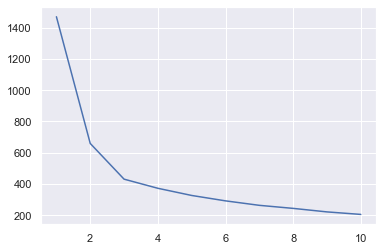

In [57]:
plt.plot(range(1,11), wss)

In [58]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [59]:
df2=df.copy()

In [60]:
df2["Clus_kmeans"] = labels
df2.drop(["clusters"],axis=1).head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [61]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [62]:
silhouette_score(scaled_df,labels)

0.4007270552751299

In [63]:
sil_width = silhouette_samples(scaled_df,labels)

In [64]:
df2["sil_width"] = sil_width
df2.drop(["clusters"],axis=1).head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276


In [65]:
silhouette_samples(scaled_df,labels).min()

0.002713089347678533

### K Mean Cluster Frequency

In [66]:
df2.Clus_kmeans.value_counts().sort_index()

0    72
1    67
2    71
Name: Clus_kmeans, dtype: int64

In [67]:
kmeandata=df2.drop(["clusters"],axis=1).groupby('Clus_kmeans').mean()
kmeandata['Freq']=df2.drop(["clusters"],axis=1).Clus_kmeans.value_counts().sort_index()
kmeandata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Freq
Clus_kmeans,,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,0.397473,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,0.468772,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,0.339816,71


# Problem 2: CART-RF-ANN

### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

#### Attribute Information:

#### 1. Target: Claim Status (Claimed)
#### 2. Code of tour firm (Agency_Code)
#### 3. Type of tour insurance firms (Type)
#### 4. Distribution channel of tour insurance agencies (Channel)
#### 5. Name of the tour insurance products (Product)
#### 6. Duration of the tour (Duration)
#### 7. Destination of the tour (Destination)
#### 8. Amount of sales of tour insurance policies (Sales)
#### 9. The commission received for tour insurance firm (Commission)
#### 10. Age of insured (Age)

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

### Import Libraries and load data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(color_codes=True)
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [43]:
os.chdir('C:\\Users\\Vikas\\Desktop\\Thankappan\\GREAT LAKES DS&BA\\ref\\Data Mining Project')
mydata=pd.read_csv("insurance_part2_data.csv")

### Checking the data

In [44]:
mydata.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [45]:
mydata.shape

(3000, 10)

In [46]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


#### 'Claimed' is the target variable while all others are the predictors.
#### Out of the 10 columns, 6 are object type, while remaining 4 are int/float.
#### Object - Agency_Code, Type, Claimed, Channel, Product Name, Destination
#### Int64 - Age, Duration
#### Float64 - Commision, Sales 
#### It appears there are also  missing values.

### Checking for missing values

In [47]:
mydata.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

### Checking for duplicates

In [48]:
# Are there any duplicates ?
dups = mydata.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
mydata[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


### Removing Duplicates

In [49]:
mydata.drop_duplicates(inplace=True) 

In [50]:
dups = mydata.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(mydata.shape)

Number of duplicate rows = 0
(2861, 10)


### Checking the Summary Statistic

In [51]:
mydata.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.120238,61.757878
std,10.678106,25.826834,135.977200,71.399740
min,8.000000,0.000000,-1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


### Preprocessing for removal of erroneous datapoints

#### Since duration of a trip cannot negative or zero values with respect to insurance claims, the corresponding rows need be dropped. Since the total rows are only, 3, we go ahead and drop the same and do not impute. 

In [52]:
mydata[(mydata['Duration']==-1)]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [53]:
mydata[(mydata['Duration']==0)]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA


In [54]:
mydata.drop(mydata.index[[1508,1746,2628]],inplace=True)

In [55]:
mydata.shape

(2858, 10)

### Checking for Outliers

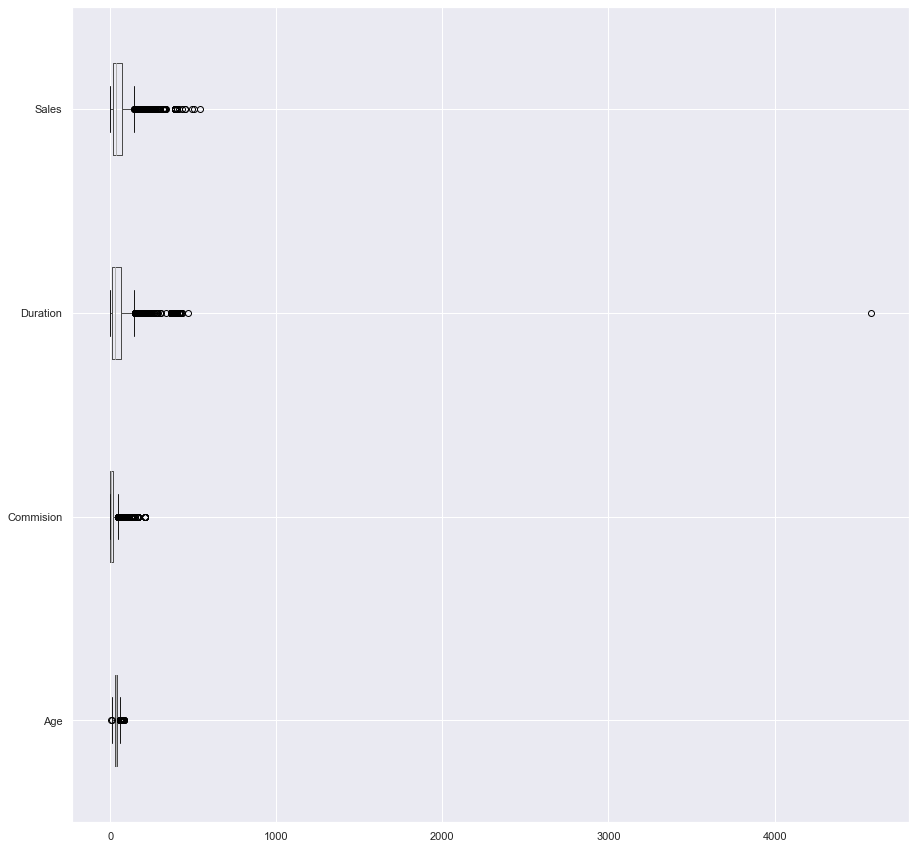

In [58]:
# construct box plot for continuous variables
plt.figure(figsize=(15,15))
mydata.boxplot(vert=0)

#### There are outliers in all the variables. Random Forest and ANN can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is. 

### Checking pairwise distribution of the continuous variables

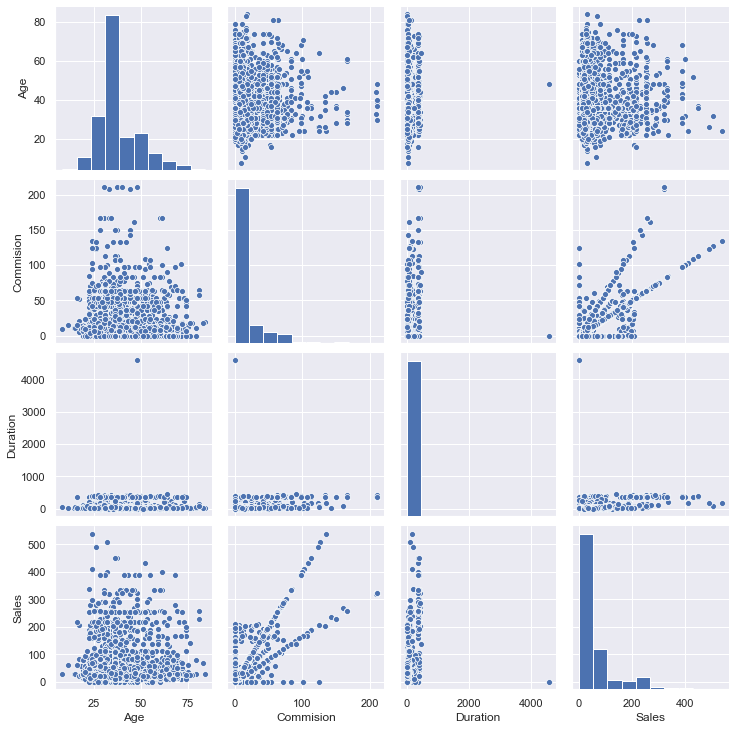

In [59]:
sns.pairplot(mydata)

### Checking for Correlations

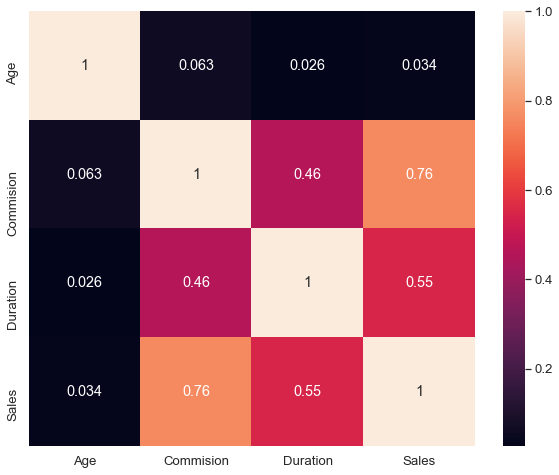

In [60]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(mydata.corr(), annot=True)

#### There are mostly positive correlations between variables, and no negative correlations.
#### Magnitude of correlation between Sales & Commission and between Sales & Duration are high

### Geting unique counts of all Objects

In [61]:
mydata['Agency_Code'].value_counts()

EPX    1236
C2B     912
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

In [62]:
mydata['Type'].value_counts()

Travel Agency    1707
Airlines         1151
Name: Type, dtype: int64

In [63]:
mydata['Channel'].value_counts()

Online     2812
Offline      46
Name: Channel, dtype: int64

In [64]:
mydata['Product Name'].value_counts()

Customised Plan      1069
Bronze Plan           645
Cancellation Plan     615
Silver Plan           420
Gold Plan             109
Name: Product Name, dtype: int64

In [65]:
mydata['Destination'].value_counts()

ASIA        2324
Americas     319
EUROPE       215
Name: Destination, dtype: int64

In [66]:
mydata['Claimed'].value_counts()

No     1946
Yes     912
Name: Claimed, dtype: int64

### Converting all objects to categorical codes

In [67]:
for feature in mydata.columns: 
    if mydata[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(mydata[feature].unique()))
        print(pd.Categorical(mydata[feature].unique()).codes)
        mydata[feature] = pd.Categorical(mydata[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [68]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2858 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2858 non-null   int64  
 1   Agency_Code   2858 non-null   int8   
 2   Type          2858 non-null   int8   
 3   Claimed       2858 non-null   int8   
 4   Commision     2858 non-null   float64
 5   Channel       2858 non-null   int8   
 6   Duration      2858 non-null   int64  
 7   Sales         2858 non-null   float64
 8   Product Name  2858 non-null   int8   
 9   Destination   2858 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 208.4 KB


In [69]:
mydata.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


### Proportion of 1s and 0s

In [70]:
mydata.Claimed.value_counts(normalize=True)

0    0.680896
1    0.319104
Name: Claimed, dtype: float64

#### There is no issue of class imbalance here as we have reasonable proportions in both the classes

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

### Extracting the target column into separate vectors for training set and test set 

In [71]:
X = mydata.drop("Claimed", axis=1)
y = mydata.pop("Claimed")
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


### Splitting data into training and test set

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [73]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2000, 9)
X_test (858, 9)
train_labels (2000,)
test_labels (858,)


### Building a Decision Tree Classifier

In [74]:
os.getcwd()

'C:\\Users\\Vikas\\Desktop\\Thankappan\\GREAT LAKES DS&BA\\ref\\Data Mining Project'

In [75]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [76]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [77]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

#### The above code will save a .dot file in your working directory.
#### WebGraphviz is Graphviz in the Browser.
#### Copy paste the contents of the file into the link below to get the visualization
#### http://webgraphviz.com/



### Variable Importance

In [78]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.267614
Sales         0.230480
Agency_Code   0.184133
Age           0.181930
Commision     0.077680
Destination   0.028102
Product Name  0.024534
Channel       0.004379
Type          0.001147


### Predicting Test Data 

In [79]:
y_predict = dt_model.predict(X_test)

In [80]:
y_predict.shape

(858,)

### Regularising the Decision Tree

### Adding Tuning Parameters

In [81]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 14, random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=14, random_state=1)

### Generating New Tree

In [82]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

### Variable Importance

In [83]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.252267
Sales         0.234190
Duration      0.223210
Age           0.159380
Commision     0.055417
Destination   0.033546
Product Name  0.033174
Channel       0.008815
Type          0.000000


### Print Feature Importances

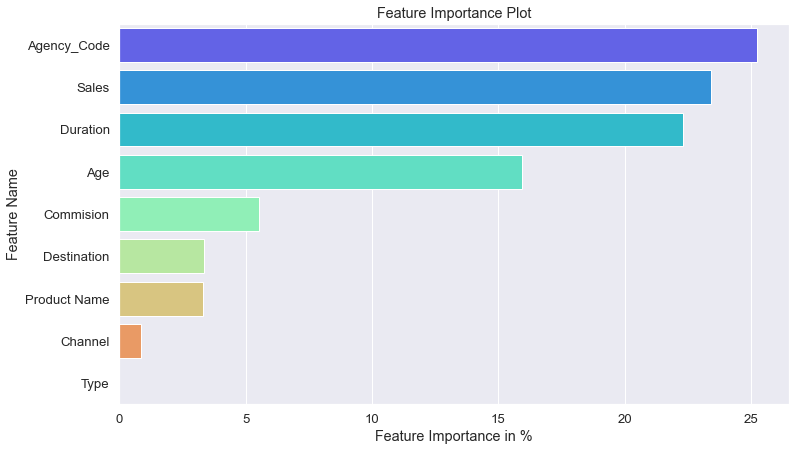

In [84]:
x=pd.DataFrame(reg_dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

### Predicting on Training and Test dataset

In [85]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [86]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (2000,)
ytest_predict (858,)


### Getting the Predicted Classes

In [87]:
ytest_predict

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

### Getting the Predicted Probabilities

In [88]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.73154362, 0.26845638],
       [0.42105263, 0.57894737],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.76470588, 0.23529412],
       [1.        , 0.        ]])

In [89]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.731544,0.268456
1,0.421053,0.578947
2,1.000000,0.000000
3,0.609756,0.390244
4,0.246154,0.753846


### Model Evaluation

### Measuring AUC-ROC Curve

### AUC and ROC for the training data

AUC: 0.969


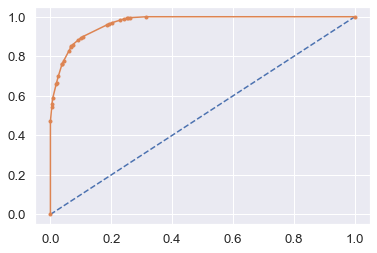

In [90]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.692


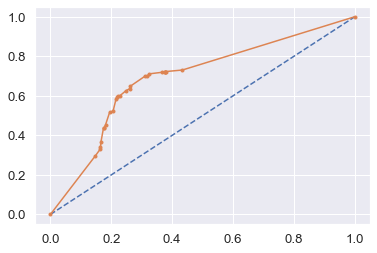

In [91]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [92]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels)

0.9045

In [93]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1344
           1       0.86      0.85      0.85       656

    accuracy                           0.90      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.90      0.90      0.90      2000



In [94]:
confusion_matrix(test_labels, ytest_predict)

array([[469, 133],
       [103, 153]], dtype=int64)

In [95]:
#Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.7249417249417249

In [96]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       602
           1       0.53      0.60      0.56       256

    accuracy                           0.72       858
   macro avg       0.68      0.69      0.68       858
weighted avg       0.73      0.72      0.73       858



## Building a Decision Tree Classifier

In [97]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [98]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=300,
                       random_state=1)

### Generating Tree

In [99]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

### Variable Importance

In [100]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.620457
Sales         0.301461
Product Name  0.042319
Age           0.015729
Commision     0.010860
Duration      0.009176
Type          0.000000
Channel       0.000000
Destination   0.000000


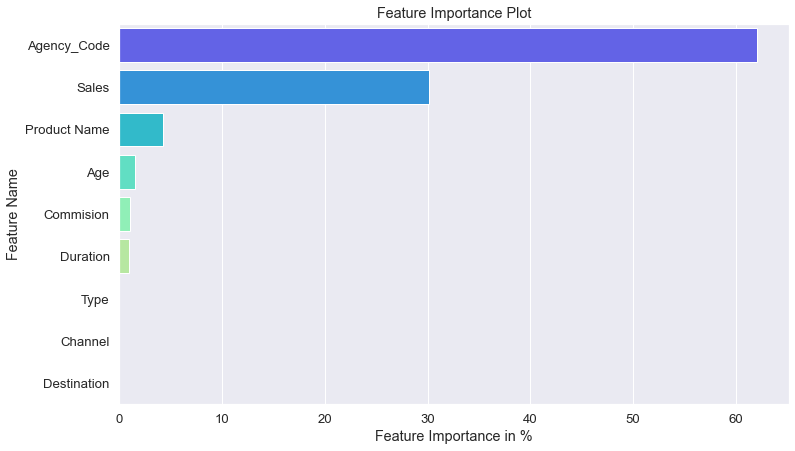

In [101]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

### Predicting on Training and Test dataset

In [102]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### Getting the Predicted Classes and Probs

In [103]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.746888,0.253112
1,0.454849,0.545151
2,0.970149,0.029851
3,0.636364,0.363636
4,0.224561,0.775439


### Model Evaluation

### AUC and ROC for the training data

AUC: 0.809


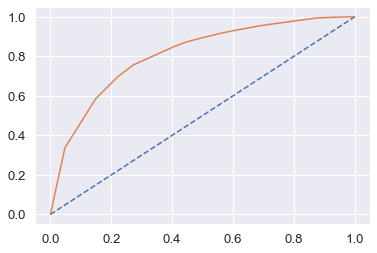

In [104]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.807


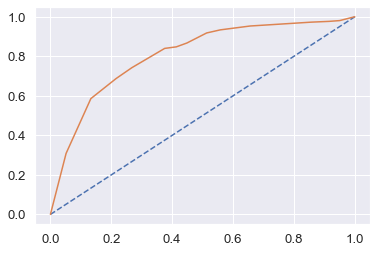

In [105]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [106]:
confusion_matrix(train_labels, ytrain_predict)

array([[1144,  200],
       [ 272,  384]], dtype=int64)

In [107]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.764

In [108]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1344
           1       0.66      0.59      0.62       656

    accuracy                           0.76      2000
   macro avg       0.73      0.72      0.72      2000
weighted avg       0.76      0.76      0.76      2000



In [109]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.66
cart_train_recall  0.59
cart_train_f1  0.62


### Confusion Matrix for test data

In [110]:
confusion_matrix(test_labels, ytest_predict)

array([[522,  80],
       [106, 150]], dtype=int64)

In [111]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7832167832167832

In [112]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       602
           1       0.65      0.59      0.62       256

    accuracy                           0.78       858
   macro avg       0.74      0.73      0.73       858
weighted avg       0.78      0.78      0.78       858



In [113]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.65
cart_test_recall  0.59
cart_test_f1  0.62


# Cart Conclusion
#### Train Data:
#### AUC: 81%
#### Accuracy: 76.4%
#### Precision: 66%
#### f1-Score: 62%

#### Test Data:
#### AUC: 81%
#### Accuracy: 78.2%
#### Precision: 65%
#### f1-Score: 62%

#### Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

#### Agency Code is the most important variable for predicting Claim Status

# Building a Random Forest Classifier

### Grid Search for finding out the optimal values for the hyper parameters

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10,20,30,40], 
    'max_features': [5,6,7,8],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [150,300,450],
    'n_estimators': [100,200,300,500] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [115]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': [5, 6, 7, 8],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [150, 300, 450],
                         'n_estimators': [100, 200, 300, 500]})

In [116]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 300}

In [117]:
best_grid = grid_search.best_estimator_

In [118]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=300, random_state=1)

### Predicting the Training and Testing data

In [119]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### RF Model Performance Evaluation on Training data 

In [120]:
confusion_matrix(train_labels,ytrain_predict)

array([[1170,  174],
       [ 293,  363]], dtype=int64)

In [121]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7665

In [122]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1344
           1       0.68      0.55      0.61       656

    accuracy                           0.77      2000
   macro avg       0.74      0.71      0.72      2000
weighted avg       0.76      0.77      0.76      2000



In [123]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.68
rf_train_recall  0.55
rf_train_f1  0.61


Area under Curve is 0.8199620263501743


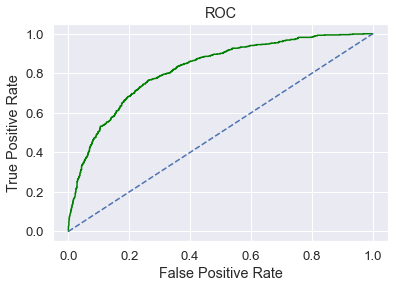

In [124]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

### RF Model Performance Evaluation on Test data 

In [125]:
confusion_matrix(test_labels,ytest_predict)

array([[531,  71],
       [115, 141]], dtype=int64)

In [126]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7832167832167832

In [127]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       602
           1       0.67      0.55      0.60       256

    accuracy                           0.78       858
   macro avg       0.74      0.72      0.73       858
weighted avg       0.78      0.78      0.78       858



In [128]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.67
rf_test_recall  0.55
rf_test_f1  0.6


Area under Curve is 0.8222883357558141


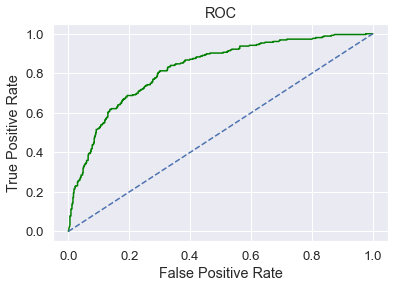

In [129]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [130]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.440463
Product Name  0.229554
Sales         0.185557
Commision     0.053228
Duration      0.039215
Age           0.024450
Type          0.023766
Destination   0.003767
Channel       0.000000


### Random Forest Conclusion
#### Train Data:
#### AUC: 82%
#### Accuracy: 77%
#### Precision: 68%
#### f1-Score: 61%

#### Test Data:
#### AUC: 82%
#### Accuracy: 78%
#### Precision: 67%
#### f1-Score: 60%

#### Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

#### Agency_Code is again the most important variable for predicting diabetes

## Building a Neural Network Classifier

In [131]:
param_grid = {
    'hidden_layer_sizes': [50,100,200], 
    'max_iter': [2500,5000], 
    'solver': ['adam','sgd'], 
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [132]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [50, 100, 200],
                         'max_iter': [2500, 5000], 'solver': ['adam', 'sgd'],
                         'tol': [0.01]})

In [133]:
grid_search.best_params_

{'hidden_layer_sizes': 200, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [134]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

### Predicting the Training and Testing data

In [135]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### NN Model Performance Evaluation on Training data

In [136]:
confusion_matrix(train_labels,ytrain_predict)

array([[1231,  113],
       [ 367,  289]], dtype=int64)

In [137]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.76

In [138]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1344
           1       0.72      0.44      0.55       656

    accuracy                           0.76      2000
   macro avg       0.74      0.68      0.69      2000
weighted avg       0.75      0.76      0.74      2000



In [139]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.72
nn_train_recall  0.44
nn_train_f1  0.55


Area under Curve is 0.7939804732868757


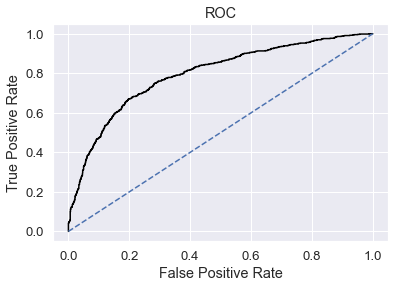

In [140]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

### NN Model Performance Evaluation on Test data

In [141]:
confusion_matrix(test_labels,ytest_predict)

array([[554,  48],
       [141, 115]], dtype=int64)

In [142]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7797202797202797

In [143]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       602
           1       0.71      0.45      0.55       256

    accuracy                           0.78       858
   macro avg       0.75      0.68      0.70       858
weighted avg       0.77      0.78      0.76       858



In [144]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.71
nn_test_recall  0.45
nn_test_f1  0.55


Area under Curve is 0.7949640521179402


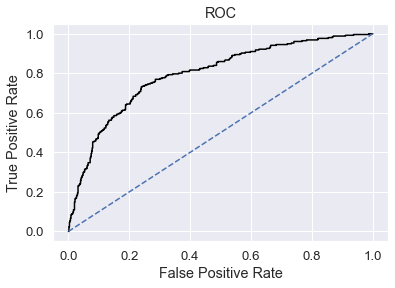

In [145]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [146]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)>

### Neural Network Conclusion
#### Train Data:
#### AUC: 79%
#### Accuracy: 76%
#### Precision: 72%
#### f1-Score: 55%

#### Test Data:
#### AUC: 79%
#### Accuracy: 78%
#### Precision: 71%
#### f1-Score: 55%

#### Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

## Final Conclusion

### Comparison of the performance metrics from the 3 models

In [147]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.76,0.78,0.77,0.78,0.76,0.78
AUC,0.81,0.81,0.82,0.82,0.79,0.79
Recall,0.59,0.59,0.55,0.55,0.44,0.45
Precision,0.66,0.65,0.68,0.67,0.72,0.71
F1 Score,0.62,0.62,0.61,0.60,0.55,0.55


### ROC Curve for the 3 models on the Training data

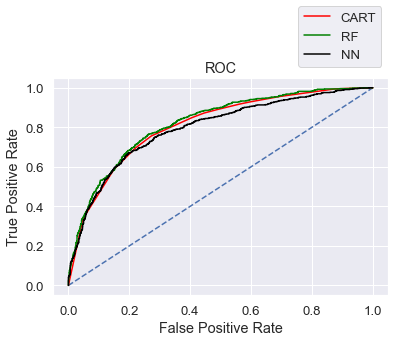

In [148]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the 3 models on the Test data 

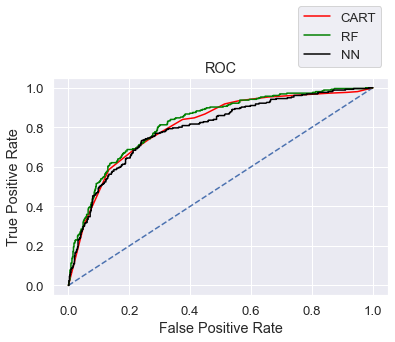

In [149]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

#### Overall all the 3 models are reasonaly stable enough to be used for making any future predictions. From Cart and Random Forest Model, the variable change is found to be the most useful feature amongst all other features for predicting if a claim will be made.